## Revision de Metodos Introductorios Pandas: 

* Estructura de un Data Frame (list(), zip(), dict())
* Graficas por columnas, Operaciones con filas, Cuantiles de una columna, Filtros (.notnull, .notna, .plot, .iloc, .loc, .info, .describe, .quantile).
* Introduccion a Resumenes .pivot_table, .melt, .value_counts, .count
* Trabajar con Fechas (to_datetime,reindex,resample,rolling,interpolate,tz_localize,tz_convert)

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Antes de comenzar a trabajar con pandas, es buena practica concer los objetos tipo lista, diccionarios.

El dataframe es un cojunto de listas, organizados por un diccionario.

Donde las llaves de los diccionarios seran columnas y sus elementos elementos de una columna 

In [6]:
keys = ['Estado', 'Temperatura']
values = [['Liquido','Solido','Gas'],[10,-10,30]]

In [7]:
new_colums = ['Est','Temp']
print(list(zip(keys, values)))
print(dict(list(zip(keys, values))))
data0 =pd.DataFrame(dict(list(zip(keys, values))))
print(data0)
data0.columns = new_colums
print(data0)

[('Estado', ['Liquido', 'Solido', 'Gas']), ('Temperatura', [10, -10, 30])]
{'Estado': ['Liquido', 'Solido', 'Gas'], 'Temperatura': [10, -10, 30]}
    Estado  Temperatura
0  Liquido           10
1   Solido          -10
2      Gas           30
       Est  Temp
0  Liquido    10
1   Solido   -10
2      Gas    30


En pandas existen varias funciones de lecturas de arvhivos, una de ellas read_csv.

Tiene varios parametros utiles, como separadores de columnas, nombramiento de variables, inicio de la lectura de datos, indexacion de las filas, etc...

In [8]:
data = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/austin_airport_departure_data_2015_july.csv',
                   header= 10,
                   sep = ',',
                   parse_dates = ['Date (MM/DD/YYYY)'],
                   index_col = 'Date (MM/DD/YYYY)')
data.head()

Carrier Code  Flight Number Tail Number  \
Date (MM/DD/YYYY)                                             
2015-07-01                    WN          103.0      N8607M   
2015-07-01                    WN          144.0      N8609A   
2015-07-01                    WN          178.0      N646SW   
2015-07-01                    WN          232.0      N204WN   
2015-07-01                    WN          238.0      N233LV   

                  Destination Airport  Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                 
2015-07-01                         MDW                    06:30   
2015-07-01                         SAN                    20:55   
2015-07-01                         ELP                    20:30   
2015-07-01                         ATL                    05:45   
2015-07-01                         DAL                    12:30   

                  Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                                          
2015-07-01                        06:52                            165.0   
2015-07-01                        20:50                            170.0   
2015-07-01                        20:45                             90.0   
2015-07-01                        05:49                            135.0   
2015-07-01                        12:34                             55.0   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-01                                147.0                      22.0   
2015-07-01                                158.0                      -5.0   
2015-07-01                                 80.0                      15.0   
2015-07-01                                137.0                       4.0   
2015-07-01                                 48.0                       4.0   

                  Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                  07:01                     9.0   
2015-07-01                  21:03                    13.0   
2015-07-01                  20:55                    10.0   
2015-07-01                  06:01                    12.0   
2015-07-01                  12:41                     7.0   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   

                   DelaySecurity(Minutes)  \
Date (MM/DD/YYYY)                           
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-01                            0.0   
2015-07-01                            0.0   

                   DelayLate Aircraft Arrival(Minutes)  Unnamed: 17  
Date (MM/DD/YYYY)                                                    
2015-07-01                                         0.0          NaN  
2015-07-01                                         0.0          NaN  
2015-07-01                                         0.0          NaN  
2015-07-01                                 

###### Cool! Ya tenemos datos. 

Metodos utiles para dar un primer vistazo a la estructura de nuestros datos .head(), .describe(), .info(), .notna(), notnull().all() , .loc(), .ilo(), .shape, .keys(), etc...

In [9]:
data.info() #Validano los tipos de datos (10 valores numericos y 6 categoricos)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2015-07-01 to NaT
Data columns (total 17 columns):
  Carrier Code                            1741 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
DelayNational Aviation System(Minutes)    1740 non-null 

In [10]:
data.describe() #Podemos ver que la columna 17 tiene valores NaN, lo que nos lleva a preguntar ¿existiran filas con valores NaN?

Flight Number  Scheduled Elapsed Time(Minutes)  \
count    1740.000000                      1740.000000   
mean     1901.614368                       129.663793   
std      1630.863317                        55.554491   
min        22.000000                        45.000000   
25%       622.000000                        60.000000   
50%      1185.000000                       135.000000   
75%      3054.000000                       165.000000   
max      5888.000000                       245.000000   

       Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
count                   1740.000000               1740.000000   
mean                     124.377586                 10.230460   
std                       55.028546                 28.980319   
min                        0.000000                -12.000000   
25%                       63.000000                 -2.000000   
50%                      131.000000                  0.000000   
75%                      162.000000                 10.000000   
max                      390.000000                324.000000   

       Taxi-out Time(Minutes)  DelayCarrier(Minutes)  DelayWeather(Minutes)  \
count             1740.000000            1740.000000            1740.000000   
mean                 9.937356               3.019540               0.275287   
std                  2.789549              18.390426               5.914434   
min                  0.000000               0.000000               0.000000   
25%                  8.000000               0.000000               0.000000   
50%                  9.000000               0.000000               0.000000   
75%                 11.000000               0.000000               0.000000   
max                 40.000000             322.000000             213.000000   

       DelayNational Aviation System(Minutes)  DelaySecurity(Minutes)  \
count                             1740.000000             1740.000000   
mean                                 1.102874                0.008621   
std                                  6.538627                0.259241   
min                                  0.000000                0.000000   
25%                                  0.000000                0.000000   
50%                                  0.000000                0.000000   
75%                                  0.000000                0.000000   
max                                124.000000                9.000000   

       DelayLate Aircraft Arrival(Minutes)  Unnamed: 17  
count                          1740.000000          0.0  
mean                              4.512644          NaN  
std                              17.850454          NaN  
min                               0.000000          NaN  
25%                               0.000000          NaN  
50%                               0.000000          NaN  
75%                               0.000000          NaN  
max                             282.000000          NaN

In [11]:
data.notna().tail() #Se identificaron falores NaN

Carrier Code  Flight Number  Tail Number  \
Date (MM/DD/YYYY)                                               
2015-07-31                   True           True         True   
2015-07-31                   True           True         True   
2015-07-31                   True           True         True   
2015-07-31                   True           True         True   
NaT                          True          False        False   

                   Destination Airport   Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                   
2015-07-31                         True                      True   
2015-07-31                         True                      True   
2015-07-31                         True                      True   
2015-07-31                         True                      True   
NaT                               False                     False   

                   Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-31                          True                             True   
2015-07-31                          True                             True   
2015-07-31                          True                             True   
2015-07-31                          True                             True   
NaT                                False                            False   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-31                                 True                      True   
2015-07-31                                 True                      True   
2015-07-31                                 True                      True   
2015-07-31                                 True                      True   
NaT                                       False                     False   

                   Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                            
2015-07-31                    True                    True   
2015-07-31                    True                    True   
2015-07-31                    True                    True   
2015-07-31                    True                    True   
NaT                          False                   False   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-31                          True                   True   
2015-07-31                          True                   True   
2015-07-31                          True                   True   
2015-07-31                          True                   True   
NaT                                False                  False   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-31                                           True   
2015-07-31                                           True   
2015-07-31                                           True   
2015-07-31                                           True   
NaT                                                 False   

                   DelaySecurity(Minutes)  \
Date (MM/DD/YYYY)                           
2015-07-31                           True   
2015-07-31                           True   
2015-07-31                           True   
2015-07-31                           True   
NaT                                 False   

                   DelayLate Aircraft Arrival(Minutes)  Unnamed: 17  
Date (MM/DD/YYYY)                                                    
2015-07-31                                        True        False  
2015-07-31                                        True        False  
2015-07-31                                        True        False  
20

In [138]:
data.shape

(1741, 17)

In [12]:
data = data.iloc[0:1740,0:16] #Tomando todas las filas menos la 1741
data.notna().all() #Ya no tenemos valores NaN

  Carrier Code                            True
Flight Number                             True
Tail Number                               True
Destination Airport                       True
Scheduled Departure Time                  True
Actual Departure Time                     True
Scheduled Elapsed Time(Minutes)           True
Actual Elapsed Time(Minutes)              True
Departure Delay(Minutes)                  True
Wheels-off Time                           True
Taxi-out Time(Minutes)                    True
DelayCarrier(Minutes)                     True
DelayWeather(Minutes)                     True
DelayNational Aviation System(Minutes)    True
DelaySecurity(Minutes)                    True
DelayLate Aircraft Arrival(Minutes)       True
dtype: bool

In [13]:
data.quantile([.05,.95]) #Cuantiles Columnas Numericas

Flight Number  Scheduled Elapsed Time(Minutes)  \
0.05          232.0                             50.0   
0.95         4913.0                            225.0   

      Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
0.05                          47.0                     -5.00   
0.95                         212.0                     54.05   

      Taxi-out Time(Minutes)  DelayCarrier(Minutes)  DelayWeather(Minutes)  \
0.05                     7.0                    0.0                    0.0   
0.95                    15.0                   11.0                    0.0   

      DelayNational Aviation System(Minutes)  DelaySecurity(Minutes)  \
0.05                                    0.00                     0.0   
0.95                                    5.05                     0.0   

      DelayLate Aircraft Arrival(Minutes)  
0.05                                 0.00  
0.95                                32.05

Sigamos escarbando de manera grafica nuestros datos...

In [14]:
#Grafica por columnas
data[data.keys()].plot(kind = 'box')
plt.xticks(rotation = 90)
plt.show()

In [15]:
#Inspeccionando le distribucion de una columna
data_subplots = data.iloc[:,[7,8]]
data_subplots.plot(kind = 'hist', subplots = True, bins = 30, alpha = .5)
plt.show()

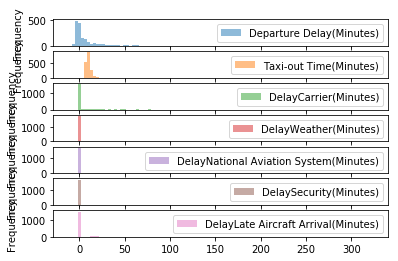

In [16]:
#Inspeccionando le distribucion de una columna
data_subplots = data.iloc[:,8:]
data_subplots.plot(kind = 'hist', subplots = True, bins = 100, alpha = .5)
plt.show()

In [26]:
data.head()

Carrier Code  Flight Number Tail Number  \
Date (MM/DD/YYYY)                                             
2015-07-01                    WN          103.0      N8607M   
2015-07-01                    WN          144.0      N8609A   
2015-07-01                    WN          178.0      N646SW   
2015-07-01                    WN          232.0      N204WN   
2015-07-01                    WN          238.0      N233LV   

                  Destination Airport  Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                 
2015-07-01                         MDW                    06:30   
2015-07-01                         SAN                    20:55   
2015-07-01                         ELP                    20:30   
2015-07-01                         ATL                    05:45   
2015-07-01                         DAL                    12:30   

                  Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                                          
2015-07-01                        06:52                            165.0   
2015-07-01                        20:50                            170.0   
2015-07-01                        20:45                             90.0   
2015-07-01                        05:49                            135.0   
2015-07-01                        12:34                             55.0   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-01                                147.0                      22.0   
2015-07-01                                158.0                      -5.0   
2015-07-01                                 80.0                      15.0   
2015-07-01                                137.0                       4.0   
2015-07-01                                 48.0                       4.0   

                  Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                  07:01                     9.0   
2015-07-01                  21:03                    13.0   
2015-07-01                  20:55                    10.0   
2015-07-01                  06:01                    12.0   
2015-07-01                  12:41                     7.0   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   

                   DelaySecurity(Minutes)  DelayLate Aircraft Arrival(Minutes)  
Date (MM/DD/YYYY)                                                               
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0

Metodos utiles para resumir datos .pivot_table, .melt, .value_counts.

In [51]:
pd.pivot_table(data, values = 'Taxi-out Time(Minutes)', index = 'Destination Airport ', columns = '  Carrier Code', aggfunc=sum).head()

Carrier Code            WN
Destination Airport         
ATL                    612.0
BNA                    553.0
BWI                    654.0
DAL                   2607.0
DCA                    322.0

In [52]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})

print(df)
pd.melt(df, id_vars=['A'], value_vars=['B']) 

   A  B  C
0  a  1  2
1  b  3  4
2  c  5  6


A variable  value
0  a        B      1
1  b        B      3
2  c        B      5

In [60]:
#Conteo de los valores distintos en una columna
data.loc[:,'Destination Airport '].value_counts().head()

DAL    289
DEN    145
PHX    120
HOU    116
LAS     92
Name: Destination Airport , dtype: int64

In [65]:
#Filtros
Filtro = data[data['Destination Airport '] == 'LAS']
Filtro.head(3)

Carrier Code  Flight Number Tail Number  \
Date (MM/DD/YYYY)                                             
2015-07-01                    WN          893.0      N251WN   
2015-07-01                    WN         1403.0      N8320J   
2015-07-01                    WN         3047.0      N8322X   

                  Destination Airport  Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                 
2015-07-01                         LAS                    05:35   
2015-07-01                         LAS                    11:25   
2015-07-01                         LAS                    20:20   

                  Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                                          
2015-07-01                        05:37                            165.0   
2015-07-01                        11:25                            165.0   
2015-07-01                        21:02                            165.0   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-01                                148.0                       2.0   
2015-07-01                                149.0                       0.0   
2015-07-01                                152.0                      42.0   

                  Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                  05:48                    11.0   
2015-07-01                  11:36                    11.0   
2015-07-01                  21:11                     9.0   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   

                   DelaySecurity(Minutes)  DelayLate Aircraft Arrival(Minutes)  
Date (MM/DD/YYYY)                                                               
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                 29.0

In [71]:
#Metodo de Encadenamiento y filtrado
#Creamos un DataFrame con valores unicos, para despues validar si contiene la palabra TYP
Unicos = pd.DataFrame(Filtro.loc[:,'Tail Number'].unique())
#Todos_pixeles.head(10)
Unicos.head()

0
0  N251WN
1  N8320J
2  N8322X
3  N493WN
4  N8617E

In [70]:
Unicos.count()

0    79
dtype: int64

In [17]:
#Me marca con un True caracteres con la palabra TYP
Pixeles_TYP = Todos_pixeles.Activity.str.contains('TYP')
Pixeles_TYP.head(10)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Activity, dtype: bool

In [18]:
#Suma de los valores con la palabra TYP
Pixeles_TYP.sum()

7

In [74]:
#Otra forma de filtrado
Filtro = data.loc[:,'Destination Airport '].str.contains('A')
Contienen_A = data[Filtro]
Contienen_A.head()

Carrier Code  Flight Number Tail Number  \
Date (MM/DD/YYYY)                                             
2015-07-01                    WN          144.0      N8609A   
2015-07-01                    WN          232.0      N204WN   
2015-07-01                    WN          238.0      N233LV   
2015-07-01                    WN          285.0      N526SW   
2015-07-01                    WN          341.0      N297WN   

                  Destination Airport  Scheduled Departure Time  \
Date (MM/DD/YYYY)                                                 
2015-07-01                         SAN                    20:55   
2015-07-01                         ATL                    05:45   
2015-07-01                         DAL                    12:30   
2015-07-01                         DAL                    09:25   
2015-07-01                         OAK                    18:00   

                  Actual Departure Time  Scheduled Elapsed Time(Minutes)  \
Date (MM/DD/YYYY)                                                          
2015-07-01                        20:50                            170.0   
2015-07-01                        05:49                            135.0   
2015-07-01                        12:34                             55.0   
2015-07-01                        09:20                             55.0   
2015-07-01                        18:30                            225.0   

                   Actual Elapsed Time(Minutes)  Departure Delay(Minutes)  \
Date (MM/DD/YYYY)                                                           
2015-07-01                                158.0                      -5.0   
2015-07-01                                137.0                       4.0   
2015-07-01                                 48.0                       4.0   
2015-07-01                                 51.0                      -5.0   
2015-07-01                                211.0                      30.0   

                  Wheels-off Time  Taxi-out Time(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                  21:03                    13.0   
2015-07-01                  06:01                    12.0   
2015-07-01                  12:41                     7.0   
2015-07-01                  09:27                     7.0   
2015-07-01                  18:46                    16.0   

                   DelayCarrier(Minutes)  DelayWeather(Minutes)  \
Date (MM/DD/YYYY)                                                 
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   
2015-07-01                           0.0                    0.0   

                   DelayNational Aviation System(Minutes)  \
Date (MM/DD/YYYY)                                           
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   
2015-07-01                                            0.0   

                   DelaySecurity(Minutes)  DelayLate Aircraft Arrival(Minutes)  
Date (MM/DD/YYYY)                                                               
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                  0.0  
2015-07-01                            0.0                                 16.0

In [75]:
Contienen_A.loc[:,'Destination Airport '].value_counts()

DAL    289
LAS     92
ATL     62
LAX     62
SAN     61
BNA     61
OAK     31
DCA     31
SNA     31
TPA     31
Name: Destination Airport , dtype: int64

#### Series de Tiempo con Pandas

Para trabajar con Fechas en Pandas y en general en cualquier lenguaje se deben definir como un tipo de datos especial.

En Pandas ayuda mucho tener el nombre de las filas con Fechas, para aplicar funciones de Tiempo.

In [3]:
datos.head(2)

Activity Campaign Site (DCM)  \
Activity Date/Time                                          
2018-01-07          MX_Aspirantes_TYP      NaN        NaN   
2018-01-07          MX_Aspirantes_TYP      NaN        NaN   

                                                       Conversion URL  \
Activity Date/Time                                                      
2018-01-07          ;src=8177298;type=typyj0;cat=mx_as0;ord=895542...   
2018-01-07          ;src=8177298;type=typyj0;cat=mx_as0;ord=213156...   

                    Total Conversions             Fecha  
Activity Date/Time                                       
2018-01-07                          1  7/1/18 - 7/12/18  
2018-01-07                          1  7/1/18 - 7/12/18

In [4]:
#Observemos el tipo de datos que son los index (DatetimeIndex)
datos.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 404925 entries, 2018-01-07 00:00:00 to 2018-11-07 08:35:00
Data columns (total 6 columns):
Activity             404925 non-null object
Campaign             76182 non-null object
Site (DCM)           76182 non-null object
Conversion URL       404925 non-null object
Total Conversions    404925 non-null int64
Fecha                404925 non-null object
dtypes: int64(1), object(5)
memory usage: 21.6+ MB


In [5]:
#Podemos especificar el formato de nuestras fechas.
time_format = '%Y-%m-%d %H:%M'
date_list = ['1992-04-21 00:09:00','1993-02-05 05:07:00']
my_datetimes = pd.to_datetime(date_list, format=time_format)
Tiempo = pd.DataFrame({'Edad':[26,25]}, index=my_datetimes)
Tiempo

Edad
1992-04-21 00:09:00    26
1993-02-05 05:07:00    25

¿Que utilidad tiene trabajar con index como Fechas?

    -Filtrado por rango de Fechas
    -Metodos para Resumenes por Fechas (resample, rolling)

In [75]:
#Filtro por rango de fechas
Filtro = datos.loc['2018-01-07 00:00:00':'2018-01-07 12:00:00']
Filtro.count()

Activity             5483
Campaign              479
Site (DCM)            479
Conversion URL       5483
Total Conversions    5483
Fecha                5483
dtype: int64

In [8]:
#Metodo resample resumenes sobre fechas 'M' (Mes), 'D' (Dia), 'Y' (Año)
datos = datos.fillna(0)
datos.loc[:,'Total Conversions'].resample('M').sum()

Activity Date/Time
2018-01-31    17755
2018-02-28    47967
2018-03-31    54534
2018-04-30    55218
2018-05-31    51405
2018-06-30    34027
2018-07-31    12987
2018-08-31    15600
2018-09-30    33242
2018-10-31    30190
2018-11-30    28153
2018-12-31    23849
Freq: M, Name: Total Conversions, dtype: int64

In [9]:
#Filtro y resumen suma por minuto
Filtro_1 = datos.loc['2018-01-07 00:00:00':'2018-01-07 12:00:00']
Filtro_1.resample('min').sum().head()

Total Conversions
Activity Date/Time                    
2018-01-07 00:00:00               18.0
2018-01-07 00:01:00               18.0
2018-01-07 00:02:00               17.0
2018-01-07 00:03:00               27.0
2018-01-07 00:04:00                3.0

In [10]:
Minutos = Filtro_1.resample('min').sum()
print(Minutos.head(3))
print(Minutos.head(3).sum())
print(Minutos.head(6))
#Metodo rolling nos crea una ventana, sumando de n en n valores
Minutos.rolling(window=3).sum().head(6)

                     Total Conversions
Activity Date/Time                    
2018-01-07 00:00:00               18.0
2018-01-07 00:01:00               18.0
2018-01-07 00:02:00               17.0
Total Conversions    53.0
dtype: float64
                     Total Conversions
Activity Date/Time                    
2018-01-07 00:00:00               18.0
2018-01-07 00:01:00               18.0
2018-01-07 00:02:00               17.0
2018-01-07 00:03:00               27.0
2018-01-07 00:04:00                3.0
2018-01-07 00:05:00               29.0


Total Conversions
Activity Date/Time                    
2018-01-07 00:00:00                NaN
2018-01-07 00:01:00                NaN
2018-01-07 00:02:00               53.0
2018-01-07 00:03:00               62.0
2018-01-07 00:04:00               47.0
2018-01-07 00:05:00               59.0

In [23]:
#Valores Faltantes e interpolacion
#Suponiendo que faltaran dias en las fechas, podemos trabajar con los datos que tenemos e interpolarlos
s = pd.Series([0, 1, np.nan, 3])
print(s)
s.interpolate() #Rellenamos el valor faltante con la media

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [44]:
#Es buena practica espeficifar la Zona Horaria con la que se esta trabajando.
Fechas = pd.Series(pd.to_datetime(datos.index))
print(type(Fechas)) #Nota es necesario trabajar con pandas.core.series.Series para aplicar los metodos de conversion de Zona horaria
Fechas = Fechas.dt.tz_localize('US/Central')
Fechas.head()

<class 'pandas.core.series.Series'>


0   2018-01-07 00:00:00-06:00
1   2018-01-07 00:00:00-06:00
2   2018-01-07 00:00:00-06:00
3   2018-01-07 00:00:00-06:00
4   2018-01-07 00:00:00-06:00
Name: Activity Date/Time, dtype: datetime64[ns, US/Central]

In [41]:
Fechas.dt.tz_convert('US/Pacific').head()

0   2018-01-06 22:00:00-08:00
1   2018-01-06 22:00:00-08:00
2   2018-01-06 22:00:00-08:00
3   2018-01-06 22:00:00-08:00
4   2018-01-06 22:00:00-08:00
Name: Activity Date/Time, dtype: datetime64[ns, US/Pacific]

Otro buen uso de tener las filas como Fechas es la Facilidad de trabajar con Graficas con tiempo.

In [48]:
Minutos.plot()
plt.show()

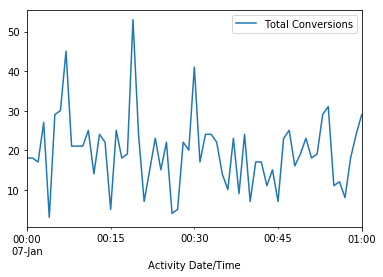

In [52]:
Minutos['2018-01-07 00:00:00':'2018-01-07 01:00:00'].plot()
plt.show()